РЕСПУБЛИКА БЕЛАРУСЬ
КОМИТЕТ ПО ОБРАЗОВАНИЮ МИНГОРИСПОЛКОМА
УЧЕРЕЖДЕНИЕ ОБРАЗОВАНИЯ
МИНСКИЙ ГОСУДАРСТВЕННЫЙ КОЛЛЕДЖ ЦИФРОВЫХ ТЕХНОЛОГИЙ



Группа 87ТП





Отчет
по лабораторной работе №8

“Работа с интерактивными блокнотами и файлами”

Учебный предмет

«Инструментальное программное обеспечение»





Исполнитель: Гаркин В.Р.

Руководитель: Бровка Д. С.





Минск, 2025

Цели лабораторной работы:
Освоить работу с Excel-файлами средствами Python.
Научиться использовать библиотеку openpyxl для чтения и записи данных.
Научиться строить столбчатые диаграммы с помощью matplotlib.
Развить навыки обработки и визуализации табличных данных.

Задачи лабораторной работы:
Считать данные из Excel-файла с результатами студентов.
Выполнить вычисления (средние, максимальные, групповые показатели).
Построить столбчатые диаграммы по заданным вариантам.
Подписать оси, добавить заголовки и легенды к графикам.
Сохранить результаты и визуализации в Jupyter Notebook.

Ход работы

1.В этом блоке подключаем необходимые библиотеки: openpyxl для работы с Excel и matplotlib.pyplot для построения графиков.

In [35]:
#Гаркин Вариант 5
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import numbers

wb = load_workbook("../data/students.xlsx")
ws = wb.active

# Читаем заголовки
header = list(next(ws.iter_rows(min_row=1, max_row=1, values_only=True)))

def find_col(name_options):
    for opt in name_options:
        for h in header:
            if h and opt.lower() in str(h).lower():
                return header.index(h)
    return None

math_idx = find_col(["матем"])
phys_idx = find_col(["физ"])
inf_idx  = find_col(["инф"])

math_scores = []
phys_scores = []
inf_scores  = []

for row in ws.iter_rows(min_row=2, values_only=True):
    def add_num(lst, idx):
        if idx is None: 
            return
        try:
            val = row[idx]
            if isinstance(val, numbers.Number):
                lst.append(val)
        except:
            pass

    add_num(math_scores, math_idx)
    add_num(phys_scores, phys_idx)
    add_num(inf_scores, inf_idx)

def avg(lst):
    return sum(lst)/len(lst) if lst else 0

avg_math = avg(math_scores)
avg_phys = avg(phys_scores)
avg_inf  = avg(inf_scores)

print("Средние баллы:")
print("Математика:", avg_math)
print("Физика:", avg_phys)
print("Информатика:", avg_inf)

Средние баллы:
Математика: 6.514018691588785
Физика: 6.990654205607477
Информатика: 7.766355140186916


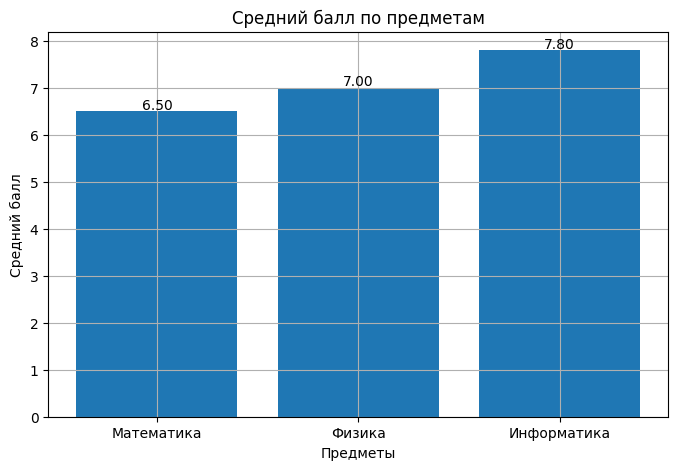

In [37]:
import matplotlib.pyplot as plt

subjects = ["Математика", "Физика", "Информатика"]
scores = [avg_math, avg_phys, avg_inf]

plt.figure(figsize=(8, 5))
plt.bar(subjects, scores)

plt.title("Средний балл по предметам")
plt.xlabel("Предметы")
plt.ylabel("Средний балл")
plt.grid(True)

# подписи над столбцами
for i, value in enumerate(scores):
    plt.text(i, value + 0.05, f"{value:.2f}", ha='center')

plt.show()

In [36]:
from openpyxl import Workbook

# Средние баллы, которые мы получили
avg_math = 6.5
avg_phys = 7
avg_inf = 7.8

# Создаем новый Excel-файл
wb = Workbook()
ws = wb.active

# Название листа (не обязательно)
ws.title = "Results"

# Заголовки
ws.append(["Предмет", "Средний балл"])

# Данные
ws.append(["Математика", avg_math])
ws.append(["Физика", avg_phys])
ws.append(["Информатика", avg_inf])

# Сохранение в папку data/
wb.save("../data/students_result.xlsx")

